# Without Tensorflow

In [6]:
import csv
from PIL import Image # pip install Pillow
import numpy as np
from matplotlib import pyplot
from os import path
import pandas as pd

In [7]:
NUM_PEOPLE_TO_READ_IN = 10000
TEST_RATIO = 0.20;

In [8]:
data = {
    "images":np.empty((NUM_PEOPLE_TO_READ_IN*4,50,50,3)),
    "X":np.empty((NUM_PEOPLE_TO_READ_IN*4,50*50*3)),
    "Y":np.empty((NUM_PEOPLE_TO_READ_IN*4))
}

counter = 0
with open('metadata.csv', newline='') as csvfile:
    rows = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in tuple(rows)[1:]:
        
        mask_type = int(row[1])
        filename = row[5]
        
        try:
            image = np.array(Image.open(path.join("data", str(mask_type), filename))) / 255.0
        except FileNotFoundError:
            image = np.zeros([50,50,3]) # USED FOR DISPLAYING NICELY BELOW / TODO: MAKE SURE TO FILTER THESE AT SOME POINT
            
        data["images"][counter] = image
        data["X"][counter] = np.reshape(image, 50*50*3)
        data["Y"][counter] = mask_type
        
        counter += 1
        if(counter >= NUM_PEOPLE_TO_READ_IN*4):
            break
            
    data["images"] = data["images"]
    data["X"] = data["X"]
    data["Y"] = data["Y"].astype("int")

In [9]:
print(data["images"].shape)
print(data["X"].shape)
print(data["Y"].shape)

(40000, 50, 50, 3)
(40000, 7500)
(40000,)


In [10]:
pd.DataFrame(data["X"])

,0,1,2,3,4,5,6,7,8,9,...,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,0.600000,0.478431,0.458824,0.623529,0.501961,0.482353,0.639216,0.521569,0.490196,0.658824,...,0.031373,0.439216,0.207843,0.231373,0.403922,0.160784,0.180392,0.376471,0.133333,0.152941
1,0.647059,0.529412,0.529412,0.658824,0.541176,0.541176,0.670588,0.560784,0.556863,0.686275,...,0.094118,0.505882,0.231373,0.270588,0.533333,0.243137,0.294118,0.478431,0.188235,0.239216
2,0.698039,0.627451,0.611765,0.709804,0.639216,0.623529,0.729412,0.650980,0.647059,0.741176,...,0.156863,0.400000,0.227451,0.278431,0.529412,0.309804,0.360784,0.447059,0.211765,0.258824
3,0.756863,0.717647,0.721569,0.772549,0.733333,0.737255,0.788235,0.729412,0.749020,0.800000,...,0.321569,0.372549,0.172549,0.231373,0.239216,0.078431,0.141176,0.305882,0.164706,0.219608
4,0.800000,0.749020,0.686275,0.788235,0.737255,0.674510,0.827451,0.764706,0.713725,0.831373,...,0.137255,0.211765,0.176471,0.117647,0.207843,0.180392,0.117647,0.211765,0.184314,0.121569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.658824,0.698039,0.662745,0.670588,0.709804,0.674510,0.682353,0.721569,0.686275,0.690196,...,0.156863,0.164706,0.125490,0.117647,0.145098,0.101961,0.094118,0.145098,0.101961,0.094118
39996,0.152941,0.039216,0.023529,0.145098,0.031373,0.015686,0.141176,0.027451,0.011765,0.141176,...,0.360784,0.501961,0.364706,0.290196,0.466667,0.337255,0.262745,0.435294,0.305882,0.231373
39997,0.078431,0.015686,0.015686,0.094118,0.031373,0.031373,0.090196,0.035294,0.031373,0.082353,...,0.168627,0.560784,0.490196,0.482353,0.729412,0.615686,0.560784,0.705882,0.564706,0.478431
39998,0.113725,0.035294,0.031373,0.113725,0.035294,0.031373,0.113725,0.043137,0.035294,0.113725,...,0.439216,0.552941,0.482353,0.443137,0.556863,0.482353,0.454902,0.549020,0.474510,0.447059


In [11]:
pd.DataFrame(data["Y"], columns=np.array(["Y"]))

,Y
0,1
1,2
2,3
3,4
4,1
...,...
39995,4
39996,1
39997,2
39998,3


In [12]:
# Maximum of 10000 people (~240MB for .ipynb file) for full dataset
# Maximum of about 1045 people (25MB for .ipynb file) for Jupyter Notebook
# Maximum of about 4180 people (100MB for .ipynb file) for github upload
NUM_PEOPLE_TO_PLOT=100

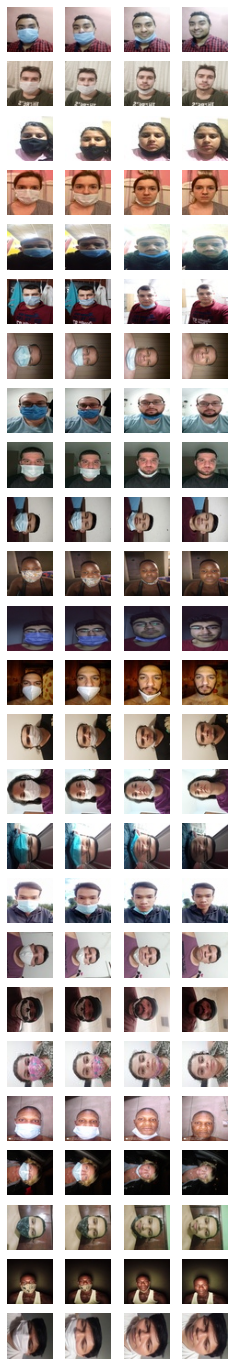

In [13]:
pyplot.figure(figsize=(4, NUM_PEOPLE_TO_PLOT))
counter = 0
for img in data["images"]:
    pyplot.subplot(NUM_PEOPLE_TO_PLOT, 4, counter+1)
    pyplot.axis("off")
    pyplot.imshow(img)
    counter += 1
    if(counter >= NUM_PEOPLE_TO_PLOT):
        break;
    

In [16]:
shuffler = np.random.permutation(NUM_PEOPLE_TO_READ_IN*4)

cut_index = int(NUM_PEOPLE_TO_READ_IN*4*TEST_RATIO)

x_scaled = data["X"]*2-1

x_shuffled = x_scaled[shuffler]
y_shuffled = data["Y"][shuffler]

x_train = x_shuffled[cut_index:]
x_test = x_shuffled[0:cut_index]

y_train = y_shuffled[cut_index:]
y_test = y_shuffled[0:cut_index]


In [17]:
print(data["images"].shape)

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(40000, 50, 50, 3)
(32000, 7500)
(8000, 7500)
(32000,)
(8000,)


# With Tensorflow

## Source: https://www.tensorflow.org/tutorials/images/classification

In [1]:
import tensorflow as tf
from matplotlib import pyplot
import numpy as np

2021-10-30 13:53:09.725045: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-30 13:53:09.725072: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
train_ds = tf.keras.utils.image_dataset_from_directory("data",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(50, 50),
  batch_size=32)

Found 39698 files belonging to 4 classes.
Using 31759 files for training.


2021-10-30 13:53:14.322919: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-10-30 13:53:14.322970: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-30 13:53:14.323002: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (benjamin-XPS-13-9370): /proc/driver/nvidia/version does not exist
2021-10-30 13:53:14.323760: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
val_ds = tf.keras.utils.image_dataset_from_directory("data",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(50, 50),
  batch_size=32)

Found 39698 files belonging to 4 classes.
Using 7939 files for validation.


In [4]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [5]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [6]:
num_classes = 4

model =  tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(50, 50, 3)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 50, 50, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 50, 50, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0

In [9]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


2021-10-30 13:53:22.734954: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


  4/993 [..............................] - ETA: 49s - loss: 1.4358 - accuracy: 0.1875   

2021-10-30 13:53:26.919982: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 18911232 exceeds 10% of free system memory.
2021-10-30 13:53:26.920027: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 18911232 exceeds 10% of free system memory.
2021-10-30 13:53:26.928667: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 24840000 exceeds 10% of free system memory.
2021-10-30 13:53:26.928904: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 24840000 exceeds 10% of free system memory.
2021-10-30 13:53:26.943024: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 19710000 exceeds 10% of free system memory.


993/993 [==============================] - 50s 46ms/step - loss: 0.8793 - accuracy: 0.6031 - val_loss: 0.6540 - val_accuracy: 0.7333
Epoch 2/10
993/993 [==============================] - 40s 41ms/step - loss: 0.5728 - accuracy: 0.7702 - val_loss: 0.5276 - val_accuracy: 0.7934
Epoch 3/10
993/993 [==============================] - 40s 40ms/step - loss: 0.4502 - accuracy: 0.8243 - val_loss: 0.4445 - val_accuracy: 0.8320
Epoch 4/10
993/993 [==============================] - 42s 42ms/step - loss: 0.3840 - accuracy: 0.8536 - val_loss: 0.4071 - val_accuracy: 0.8478
Epoch 5/10
993/993 [==============================] - 44s 45ms/step - loss: 0.3332 - accuracy: 0.8729 - val_loss: 0.4146 - val_accuracy: 0.8457
Epoch 6/10
993/993 [==============================] - 44s 44ms/step - loss: 0.2920 - accuracy: 0.8896 - val_loss: 0.3909 - val_accuracy: 0.8582
Epoch 7/10
993/993 [==============================] - 44s 44ms/step - loss: 0.2569 - accuracy: 0.9028 - val_loss: 0.3975 - val_accuracy: 0.8598
Epo

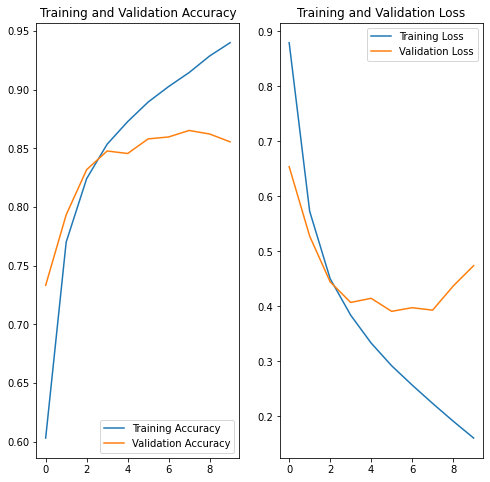

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

pyplot.figure(figsize=(8, 8))
pyplot.subplot(1, 2, 1)
pyplot.plot(epochs_range, acc, label='Training Accuracy')
pyplot.plot(epochs_range, val_acc, label='Validation Accuracy')
pyplot.legend(loc='lower right')
pyplot.title('Training and Validation Accuracy')

pyplot.subplot(1, 2, 2)
pyplot.plot(epochs_range, loss, label='Training Loss')
pyplot.plot(epochs_range, val_loss, label='Validation Loss')
pyplot.legend(loc='upper right')
pyplot.title('Training and Validation Loss')
pyplot.show()

In [24]:
class_names = ["Access Granted","Access Deniced - Please wear a mask over your nose.", "Access Denied - Please wear a mask over your mouth and nose.","Access Denied - Please wear a mask"]

In [25]:
def predict(file_path):

    img = tf.keras.utils.load_img(file_path, target_size=(50, 50))
    pyplot.imshow(img)

    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])


    print(
        "{} ({:.2f}% confidence)"
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )


Access Granted (61.64% confidence)


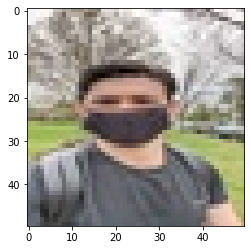

In [26]:
predict("/home/benjamin/Downloads/PXL_20210428_170036656_reduced.jpg")

Access Denied - Please wear a mask (99.99% confidence)


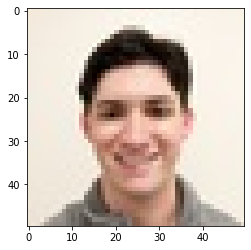

In [27]:
predict("/home/benjamin/Downloads/IMG_20200113_085742_reduced.jpg")

Access Deniced - Please wear a mask over your nose. (46.63% confidence)


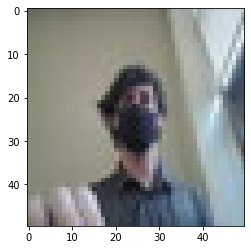

In [28]:
predict("faces/benjamin/1.jpg")

Access Deniced - Please wear a mask over your nose. (84.65% confidence)


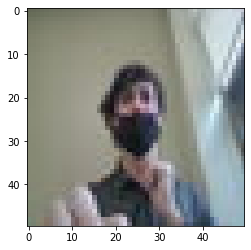

In [29]:
predict("faces/benjamin/2.jpg")

Access Denied - Please wear a mask (81.43% confidence)


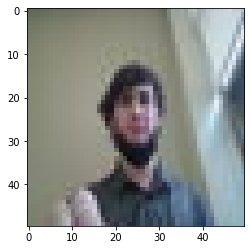

In [30]:
predict("faces/benjamin/3.jpg")

Access Denied - Please wear a mask (77.32% confidence)


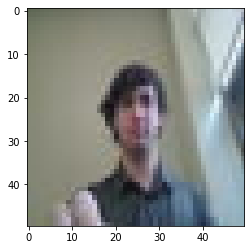

In [31]:
predict("faces/benjamin/4.jpg")